In [2]:
import copy
import lookup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
friends = lookup.my_friend_objects()
followers = lookup.my_follower_objects()

Browsing sbenthall following, new: 1444
Browsing sbenthall followers, new: 1066


In [4]:
friends_dict = {f['id'] : f for f in friends}

In [5]:
followers_dict = {f['id'] : f for f in followers}

In [6]:
len(set(friends_dict.keys()).intersection(set(followers_dict.keys())))

458

In [7]:
friend_data = {f['id'] : {'friends_count' : f['friends_count'],
                          'followers_count' : f['followers_count'],
                          'favourites_count' : f['favourites_count'],
                          'statuses_count' : f['statuses_count'],
                          'created_at' : f['created_at'],
                          'location' : f['location'],
                          'lang' : f['lang'],
                          'screen_name' : f['screen_name'],
                          'followed' : True,
                          'follower' : False,
                         } 
               for f 
               in friends_dict.values()}

In [8]:
follower_data = {f['id'] : {'friends_count' : f['friends_count'],
                          'followers_count' : f['followers_count'],
                          'favourites_count' : f['favourites_count'],
                          'statuses_count' : f['statuses_count'],
                          'created_at' : f['created_at'],
                          'location' : f['location'],
                          'lang' : f['lang'],
                          'screen_name' : f['screen_name'],
                          'followed' : False,
                          'follower' : True
                         } 
               for f 
               in followers_dict.values()}

In [9]:
egonet_data = copy.deepcopy(friend_data)

for k,v in follower_data.items():
    if k in egonet_data:
        egonet_data[k]['follower'] = True
    else:
        egonet_data[k] = v
        egonet_data[k]['followed'] = False

In [10]:
egonet_data

{748528569064710145: {'created_at': 'Thu Jun 30 14:48:12 +0000 2016',
  'favourites_count': 3521,
  'followed': True,
  'follower': False,
  'followers_count': 3183,
  'friends_count': 311,
  'lang': 'en',
  'location': 'Seattle, WA',
  'screen_name': 'mmitchell_ai',
  'statuses_count': 2011},
 772828033954750464: {'created_at': 'Mon Sep 05 16:05:36 +0000 2016',
  'favourites_count': 126,
  'followed': True,
  'follower': True,
  'followers_count': 34,
  'friends_count': 56,
  'lang': 'en',
  'location': 'Society',
  'screen_name': 'privaci_way',
  'statuses_count': 40},
 786168247301185536: {'created_at': 'Wed Oct 12 11:34:51 +0000 2016',
  'favourites_count': 388,
  'followed': True,
  'follower': False,
  'followers_count': 4796,
  'friends_count': 113,
  'lang': 'en',
  'location': 'San Francisco, CA',
  'screen_name': 'logic_magazine',
  'statuses_count': 1000},
 712424196706607104: {'created_at': 'Tue Mar 22 23:42:19 +0000 2016',
  'favourites_count': 0,
  'followed': True,
  'fo

In [40]:
import matplotlib.patches as mpatches

egonet_df = pd.DataFrame.from_dict(egonet_data, orient="index")
colors = egonet_df['followed'] *2 + egonet_df['follower']

vcm = plt.get_cmap('viridis')

followed_patch = mpatches.Patch(color=vcm(.5), label='My follower')
follower_patch = mpatches.Patch(color=vcm(0), label='I follow')

both_path = mpatches.Patch(color=vcm(.99), label='Both')

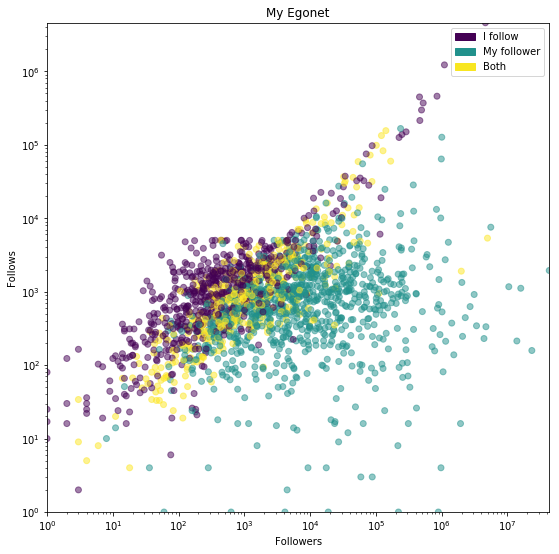

In [42]:


fig = plt.figure(figsize=(9,9))
ax = plt.gca()
scat = ax.scatter(egonet_df['followers_count'],
                  egonet_df['friends_count'],
                  c=colors,
                  alpha=.5,
                 cmap='viridis')

plt.legend(handles=[follower_patch, friends_patch, both_path])
#plt.colorbar(scat)

ax.set_title("My Egonet")

ax.set_xlabel("Followers")
ax.set_ylabel("Follows")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1,max(egonet_df['followers_count']))
ax.set_ylim(1,max(egonet_df['friends_count']))

plt.show()

In [14]:
None

In [15]:
False

False